In [58]:
import nbsetup
import scipy as sp
import ensemblepy as ep
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
m = 10
x = np.linspace(1, m, 50)
obs = 100000
datam, datav = [], []
for i in x:
    var = ep.Continuous([np.random.normal(0, i, obs), np.random.normal(0, 1, obs)])
    mean = ep.Continuous([np.random.normal(i, 2, obs), np.random.normal(1, 2, obs)])
    for e, d in ((var, datav), (mean, datam)):
        k = sp.stats.kruskal(*e.observations)
        a = sp.stats.f_oneway(*e.observations)
        d.append({
            'x': i,
            'k': k[0],
            'kp': k[1],
            'a': a[0],
            'ap': a[1],
            'i': e.incoherence,
        })
    nbsetup.cp(i)
normm, normv = pd.DataFrame(datam), pd.DataFrame(datav)

10.0


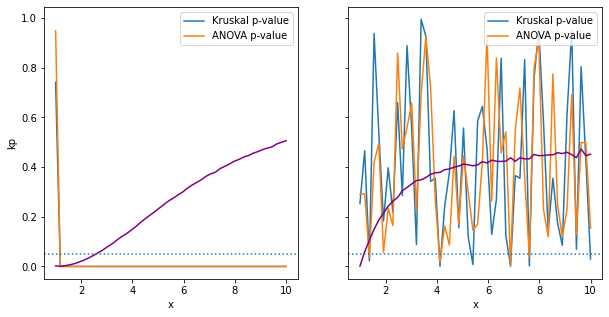

In [100]:
def plot(datam, datav):
    fig, (a0, a1) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
    
    sns.lineplot(data=datam, x='x', y='kp', label='Kruskal p-value', ax=a0)
    sns.lineplot(data=datam, x='x', y='ap', label='ANOVA p-value', ax=a0)
    sns.lineplot(data=datam, x='x', y='i', ax=a0, color='purple')
    a0.axhline(y=0.05, linestyle='dotted')
    sns.lineplot(data=datav, x='x', y='kp', label='Kruskal p-value', ax=a1)
    sns.lineplot(data=datav, x='x', y='ap', label='ANOVA p-value', ax=a1)
    sns.lineplot(data=datav, x='x', y='i', ax=a1, color='purple')
    a1.axhline(y=0.05, linestyle='dotted')

plot(normm, normv)

In [104]:
m = 10
x = np.linspace(1, m, 10)
obs = 100000
datam, datav = [], []
for i in x:
    var = ep.Continuous([np.random.power(i, size=obs), np.random.power(i, size=obs)])
    mean = var
    for e, d in ((var, datav), (mean, datam)):
        k = sp.stats.kruskal(*e.observations)
        a = sp.stats.f_oneway(*e.observations)
        d.append({
            'x': i,
            'k': k[0],
            'kp': k[1],
            'a': a[0],
            'ap': a[1],
            'i': e.incoherence,
        })
    nbsetup.cp(i)
betam, betav = pd.DataFrame(datam), pd.DataFrame(datav)

10.0


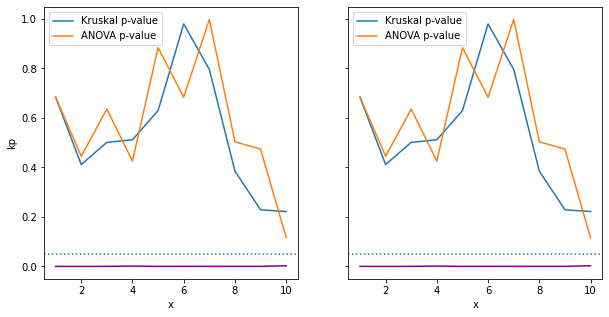

In [105]:
plot(betam, betav)

In [225]:
x = np.linspace(1, 5, 10)
trials = 1000
datam, datav = [], []
for obs in (5, 20, 100, 200, 1000):
    for i in x:
        for _ in range(trials):
            mean = ep.Continuous([np.random.normal(i, 2, obs), np.random.normal(1, 2, obs)])
            var = ep.Continuous([np.random.normal(0, i, obs), np.random.normal(0, 1, obs)], normalise=(-50,50))
            for e, d in ((var, datav), (mean, datam)):
                k = sp.stats.kruskal(*e.observations)
                a = sp.stats.f_oneway(*e.observations)
                d.append({
                    'x': i-1,
                    'k': k[0],
                    'kp': k[1],
                    'a': a[0],
                    'ap': a[1],
                    'i': e.incoherence,
                    'obs': obs,
                })
        nbsetup.cp(i, obs)
normm, normv = pd.DataFrame(datam), pd.DataFrame(datav)

5.0 1000


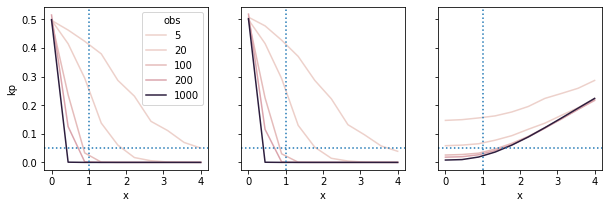

In [238]:
def plot3(data):
    fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,3))
    df = data.groupby(['x', 'obs']).mean().reset_index()
    sns.lineplot(data=df, x='x', y='kp', hue='obs', ax=axes[0])
    sns.lineplot(data=df, x='x', y='ap', hue='obs', ax=axes[1], legend=False)
    sns.lineplot(data=df, x='x', y='i', hue='obs', ax=axes[2], legend=False)
    for a in axes:
        a.axhline(y=0.05, linestyle='dotted')
        a.axvline(x=1, linestyle='dotted')

plot3(normm)

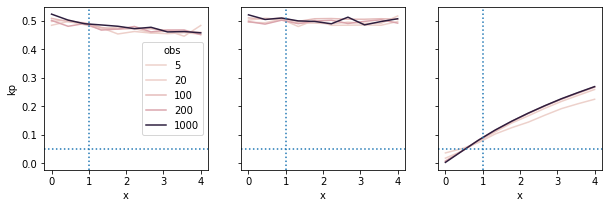

In [239]:
plot3(normv)

In [226]:
def plot(data):
    obu = data.obs.unique()
    fig, axes = plt.subplots(1, len(obu), sharex=True, sharey=True, figsize=(15,2))
    
    for i, o in enumerate(obu):
        df = data[data.obs==o].groupby(['x']).mean().reset_index()
        sns.lineplot(data=df, x='x', y='kp', ax=axes[i])
        sns.lineplot(data=df, x='x', y='ap', ax=axes[i])
        sns.lineplot(data=df, x='x', y='i', ax=axes[i], color='purple')
        axes[i].axhline(y=0.05, linestyle='dotted')
        axes[i].axvline(x=1, linestyle='dotted')
        axes[i].set(title='%s Observations' % o, ylabel=None, xlabel=None)
    return fig

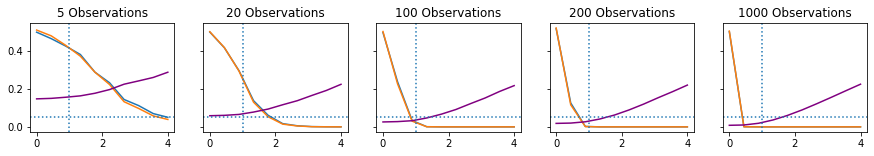

In [227]:
means = plot(normm)

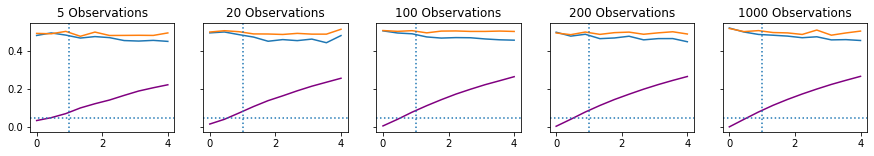

In [228]:
var = plot(normv)